## Importing Libraries

In [1]:
import os
import librosa
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

## Visualizing Single Audio

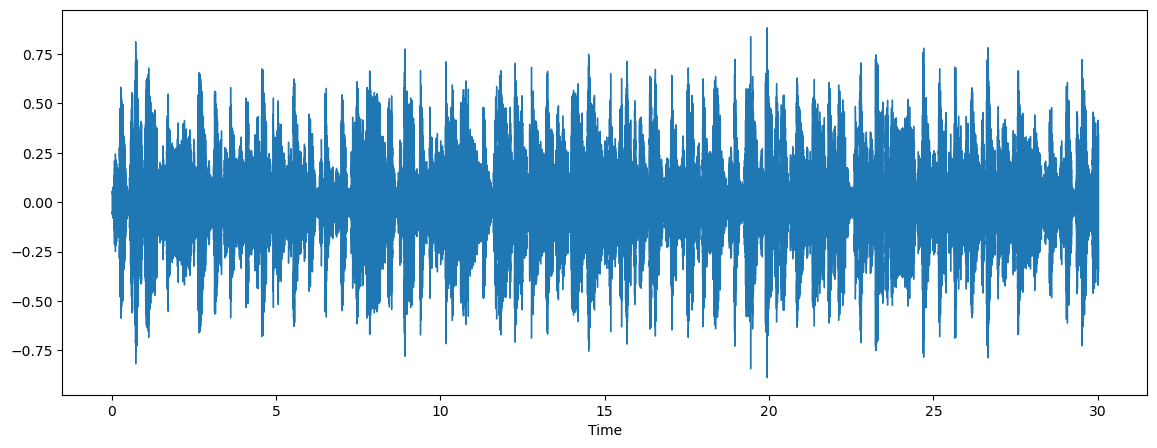

In [2]:
sample_audio = "./genres_original/blues/blues.00000.wav"
y, sr = librosa.load(sample_audio)
plt.figure(figsize=(14,5))
librosa.display.waveshow(y,sr=sr)


In [3]:
y.shape

(661794,)

## Playing audio

In [4]:
from IPython.display import Audio
Audio(data=y,rate=sr)

## Doing Visualization on chunks of Audio


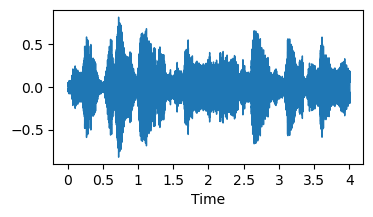

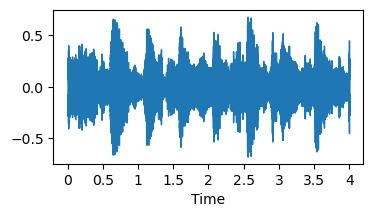

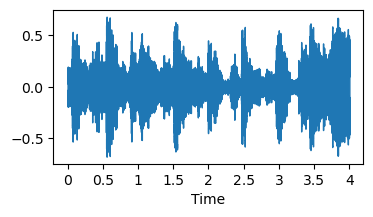

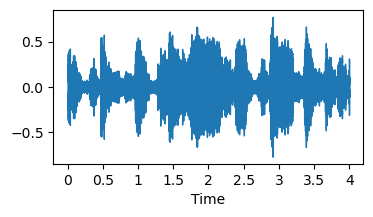

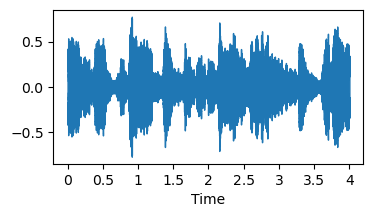

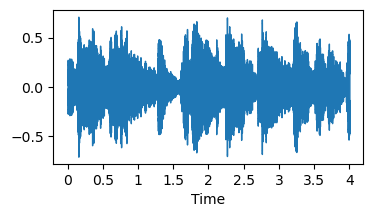

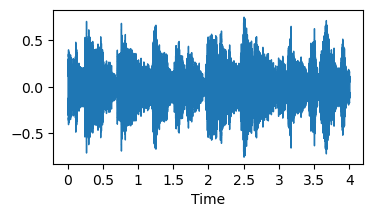

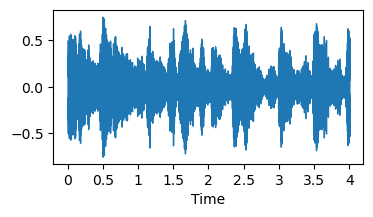

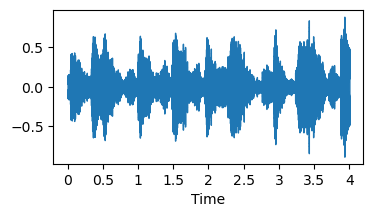

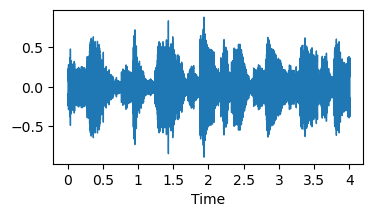

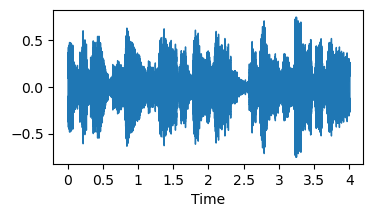

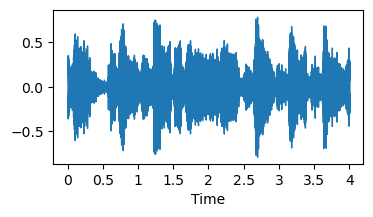

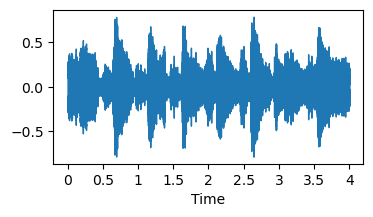

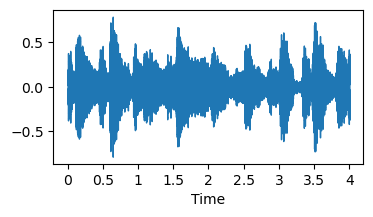

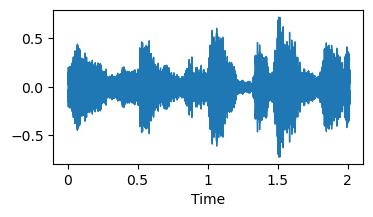

In [5]:
sample_audio = "./genres_original/blues/blues.00000.wav"
y, sr = librosa.load(sample_audio, sr=None)  # sr=None to keep the original sampling rate

# Define the duration of each chunk and overlap
chunk_duration = 4  # seconds
overlap_duration = 2  # seconds

# Convert durations to samples
chunk_samples = chunk_duration * sr
overlap_samples = overlap_duration * sr

# Calculate the number of chunks
num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

# Iterate over each chunk
for i in range(num_chunks):
    # Calculate start and end indices of the chunk
    start = i * (chunk_samples - overlap_samples)
    end = start + chunk_samples
    
    # Extract the chunk of audio
    chunk = y[start:end]
    plt.figure(figsize=(4, 2))
    librosa.display.waveshow(chunk, sr=sr)
    plt.show()

## Melspectrogram Visualization


In [6]:
#Plotting Melspectrogram of Entire Audio
def plot_melespectrogram(y,sr):
    #Compute spectrogram
    spectrogram = librosa.feature.melspectrogram(y=y,sr=sr)
    #Convert to decibels (log scale)
    spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max)
    #Visualize the spectrogram
    plt.figure(figsize=(10,4))
    librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
    plt.colorbar(format='%2.0f dB')
    plt.title("Spectrogram")
    plt.tight_layout()
    plt.show()

In [7]:
random_file_name = "./genres_original/blues/blues.00000.wav"
y,sr = librosa.load(random_file_name,sr=44100)

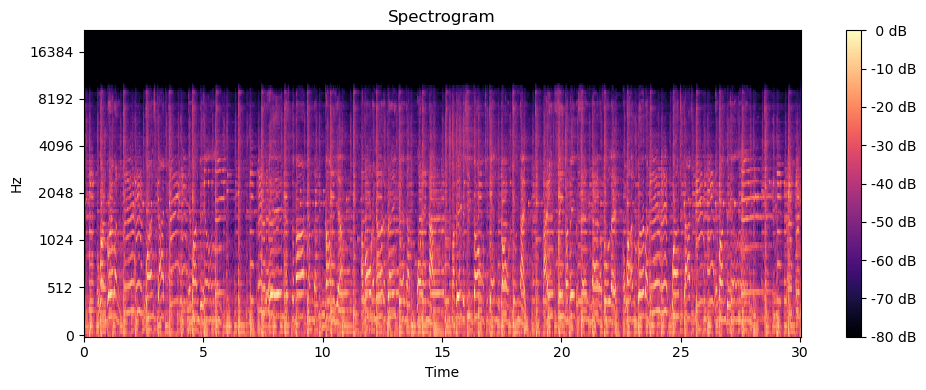

In [8]:
plot_melespectrogram(y,sr)


In [9]:
def plot_melspectrogram_chunks(y,sr):
    #define the duration of each chunk and overlap
    chunk_duration = 4
    overlap_duration = 2
    
    #Convert duration to sample
    chunk_samples = chunk_duration * sr
    overlap_samples = overlap_duration * sr
    
    #Calculate the number of chunks
    num_chunks = int(np.ceil((len(y)-chunk_samples)/(chunk_samples-overlap_samples)))+1
    
    #iterate over each chunks
    for i in range(num_chunks):
        #Calculate start and end indices of the chunk
        start = i*(chunk_samples-overlap_samples)
        end = start+chunk_samples
        #Extract the chunk audio
        chunk = y[start:end]
        #Melspectrogram part
        spectrogram = librosa.feature.melspectrogram(y=chunk,sr=sr)
        print(spectrogram.shape)
        spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max)
        #Visualize the spectrogram
        plt.figure(figsize=(10,4))
        librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
        plt.colorbar(format='%2.0f dB')
        plt.title("Spectrogram")
        plt.tight_layout()
        plt.show()

(128, 345)


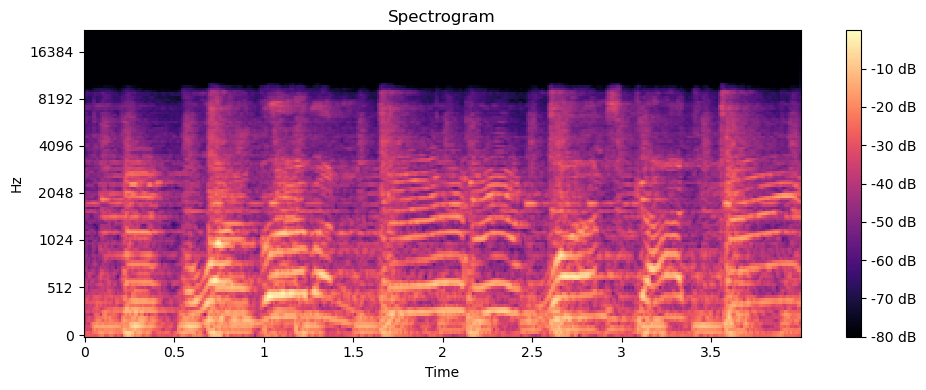

(128, 345)


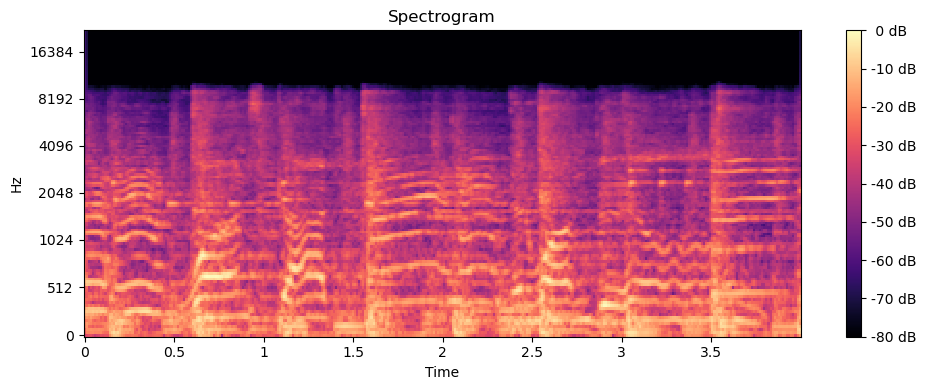

(128, 345)


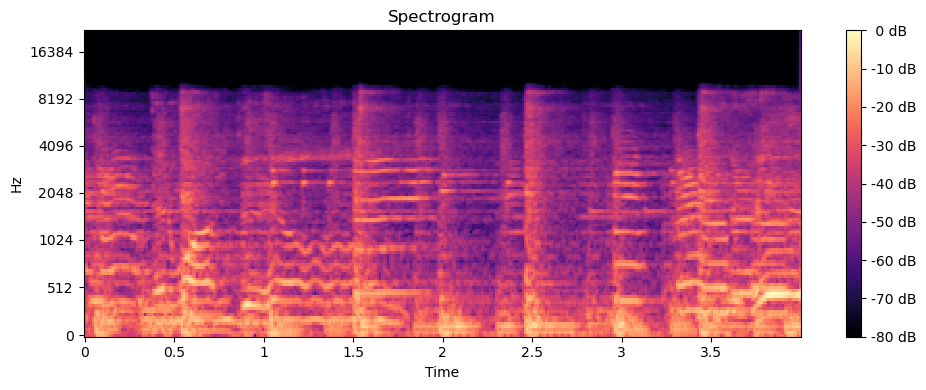

(128, 345)


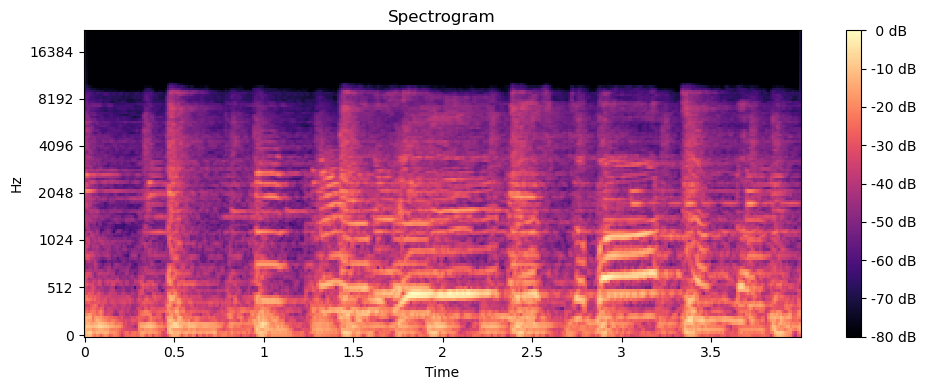

(128, 345)


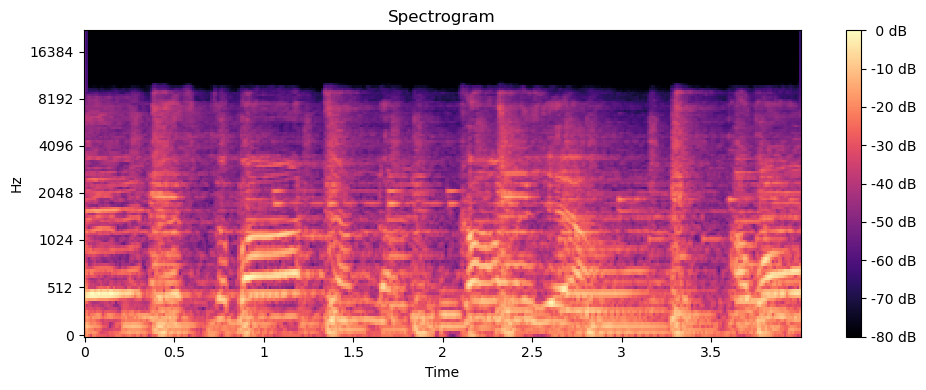

(128, 345)


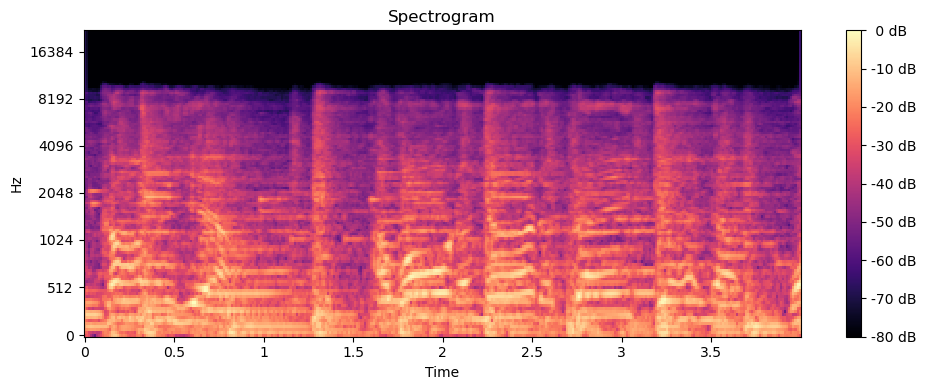

(128, 345)


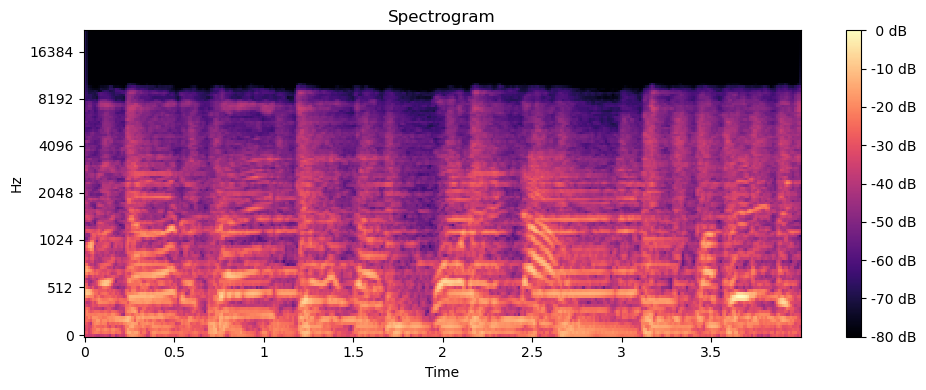

(128, 345)


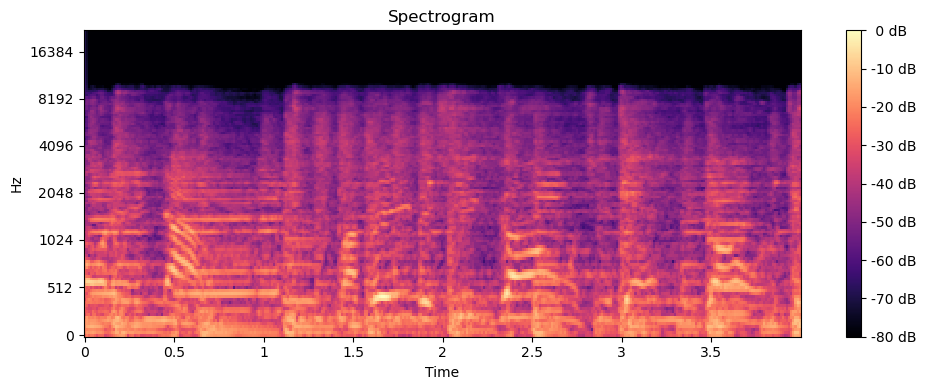

(128, 345)


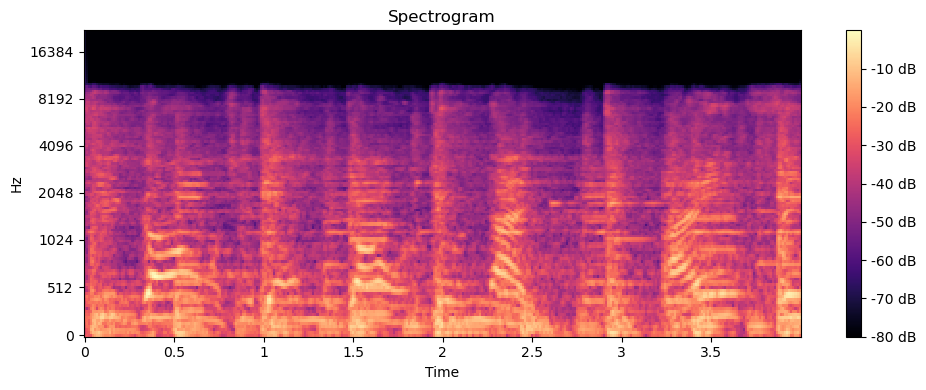

(128, 345)


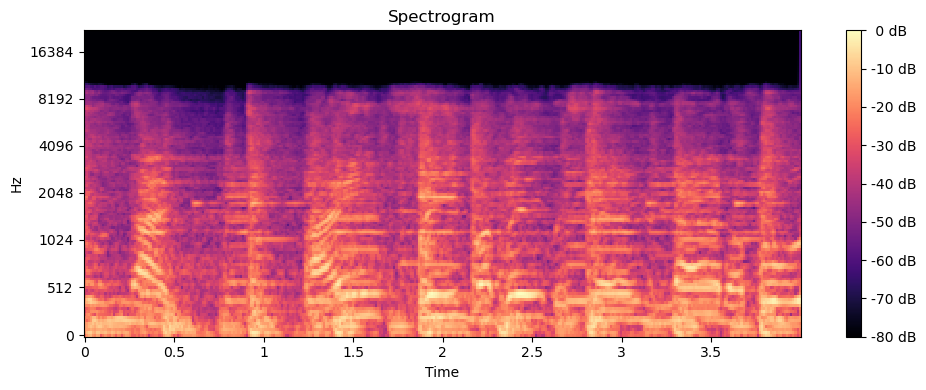

(128, 345)


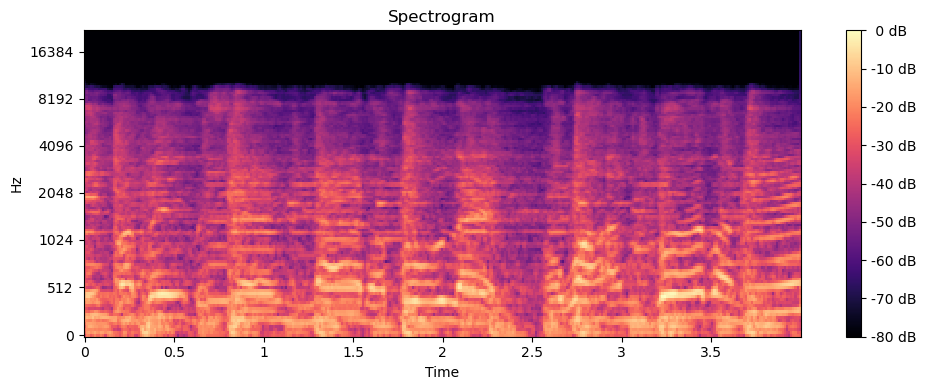

(128, 345)


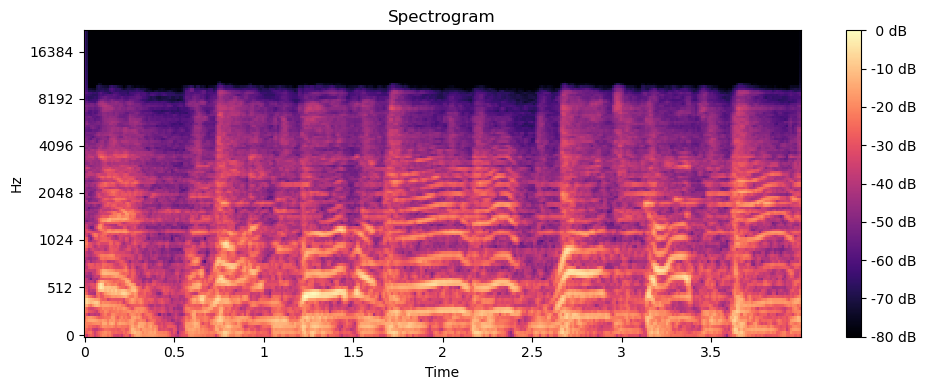

(128, 345)


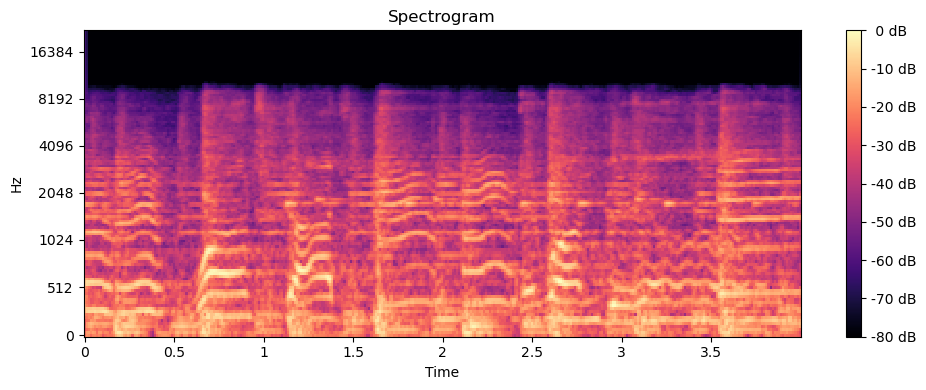

(128, 345)


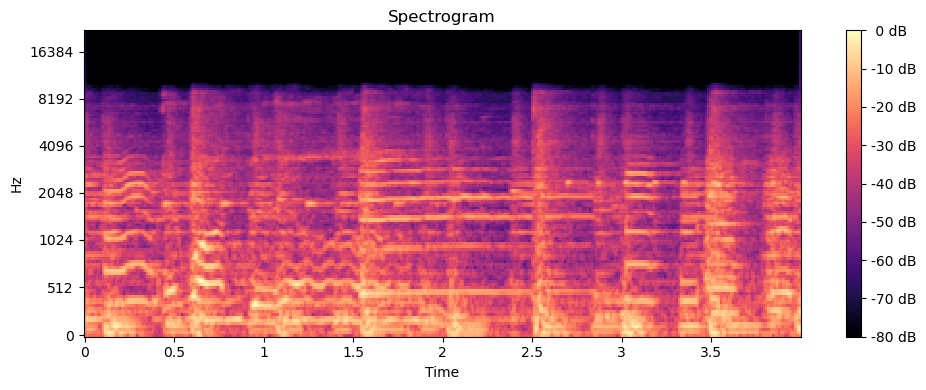

(128, 174)


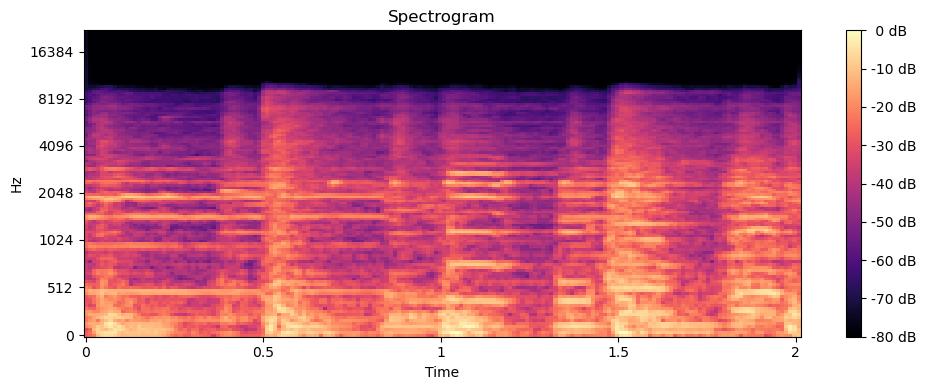

In [10]:
random_file_name = "./genres_original/blues/blues.00000.wav"
y,sr = librosa.load(random_file_name,sr=44100)
plot_melspectrogram_chunks(y,sr)


## Data preprocessing

In [11]:
#define your folder structure
data_dir = "./genres_original/"
classes = ['blues', 'classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']


In [12]:

#Load and preprocess audio data
def load_and_preprocess_data(data_dir,classes,target_shape=(150,150)):
    data=[]
    labels=[]

    for i_class,class_name in enumerate(classes):
        class_dir = os.path.join(data_dir,class_name)
        print("Processing--",class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir,filename)
                audio_data,sample_rate = librosa.load(file_path,sr=None)
                #Performing Preprocessing
                #define the duration of each chunk and overlap
                chunk_duration = 4
                overlap_duration = 2
                
                #Convert duration to sample
                chunk_samples = chunk_duration * sample_rate
                overlap_samples = overlap_duration * sample_rate
                
                #Calculate the number of chunks
                num_chunks = int(np.ceil((len(audio_data)-chunk_samples)/(chunk_samples-overlap_samples)))+1
                
                #iterate over each chunks
                for i in range(num_chunks):
                    #Calculate start and end indices of the chunk
                    start = i*(chunk_samples-overlap_samples)
                    end = start+chunk_samples
                    #Extract the chunk audio
                    chunk = audio_data[start:end]
                    #Melspectrogram part
                    mel_spectrogram = librosa.feature.melspectrogram(y=chunk,sr=sample_rate)
                    #Resize matrix based on provided target shape
                    mel_spectrogram = tf.image.resize(tf.convert_to_tensor(np.expand_dims(mel_spectrogram, axis=-1), dtype=tf.float32),target_shape)
                    #Append data to list
                    data.append(mel_spectrogram)
                    labels.append(i_class)
    #Return
    return np.array(data),np.array(labels)

In [13]:
for i_class, class_name in enumerate(classes):
    class_dir = os.path.join(data_dir, class_name)
    if not os.path.exists(class_dir):
        print(f"Class directory not found: {class_dir}")
    else:
        for filename in os.listdir(class_dir):
            file_path = os.path.join(class_dir, filename)
            if not os.path.exists(file_path):
                print(f"File not found: {file_path}")

In [14]:
audio_data, sample_rate = librosa.load(file_path, sr=None)
data,labels = load_and_preprocess_data(data_dir,classes)


Processing-- blues
Processing-- classical
Processing-- country
Processing-- disco
Processing-- hiphop
Processing-- jazz
Processing-- metal
Processing-- pop
Processing-- reggae
Processing-- rock


In [15]:
data.shape

(14270, 150, 150, 1)

In [16]:
labels.shape

(14270,)

In [17]:
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels,num_classes = len(classes)) # Converting labels to one-hot encoding
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [18]:
labels.shape

(14270, 10)

## Splitting of Dataset into Training and Test set


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,test_size=0.2,random_state=42)

## Building Model


In [20]:
model = tf.keras.models.Sequential()


In [21]:
X_train[0].shape


(150, 150, 1)

In [22]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

c:\Users\baral\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [24]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [25]:
model.add(Dropout(0.3))


In [26]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [27]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [28]:
model.add(Dropout(0.3))


In [29]:
model.add(Flatten())


In [30]:
model.add(Dense(units=1200,activation='relu'))


In [31]:
model.add(Dropout(0.45))


In [32]:
#Output layer
model.add(Dense(units=len(classes),activation='softmax'))

In [33]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 148, 148, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 74, 74, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 36, 36, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 17, 17, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1200)           │     2,458,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        12,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,182,458 (27.40 MB)

 Trainable params: 7,182,458 (27.40 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
#Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [36]:
#Training Model
training_history = model.fit(X_train,Y_train,epochs=26,batch_size=32,validation_data=(X_test,Y_test))

Epoch 1/26
357/357 ━━━━━━━━━━━━━━━━━━━━ 714s 2s/step - accuracy: 0.2928 - loss: 1.9828 - val_accuracy: 0.4926 - val_loss: 1.4316
Epoch 2/26
357/357 ━━━━━━━━━━━━━━━━━━━━ 876s 2s/step - accuracy: 0.4998 - loss: 1.4264 - val_accuracy: 0.5764 - val_loss: 1.1782
Epoch 3/26
357/357 ━━━━━━━━━━━━━━━━━━━━ 734s 2s/step - accuracy: 0.5948 - loss: 1.1554 - val_accuracy: 0.6899 - val_loss: 0.9248
Epoch 4/26
357/357 ━━━━━━━━━━━━━━━━━━━━ 712s 2s/step - accuracy: 0.6708 - loss: 0.9493 - val_accuracy: 0.7232 - val_loss: 0.8378
Epoch 5/26
357/357 ━━━━━━━━━━━━━━━━━━━━ 613s 2s/step - accuracy: 0.7206 - loss: 0.8169 - val_accuracy: 0.7456 - val_loss: 0.7539
Epoch 6/26
357/357 ━━━━━━━━━━━━━━━━━━━━ 595s 2s/step - accuracy: 0.7559 - loss: 0.7232 - val_accuracy: 0.7439 - val_loss: 0.7710
Epoch 7/26
357/357 ━━━━━━━━━━━━━━━━━━━━ 568s 2s/step - accuracy: 0.7805 - loss: 0.6541 - val_accuracy: 0.7800 - val_loss: 0.6305
Epoch 8/26
357/357 ━━━━━━━━━━━━━━━━━━━━ 567s 2s/step - accuracy: 0.8198 - loss: 0.5140 - val_accu

In [3]:
model.save("Trained_model2.h5") 




NameError: name 'model' is not defined

In [38]:
training_history.history


{'accuracy': [0.3569551408290863,
  0.5299579501152039,
  0.6181674599647522,
  0.6730027794837952,
  0.7196040749549866,
  0.7638401985168457,
  0.7874036431312561,
  0.8194639086723328,
  0.8503854274749756,
  0.8696566224098206,
  0.8848983645439148,
  0.9068850874900818,
  0.9148563146591187,
  0.9255430698394775,
  0.9405220746994019,
  0.9504204392433167,
  0.9500700831413269,
  0.9611948132514954,
  0.9581289291381836,
  0.9657498002052307,
  0.9639979004859924,
  0.9684653282165527,
  0.97599858045578,
  0.9703048467636108,
  0.9767869710922241,
  0.9775753617286682],
 'loss': [1.821640968322754,
  1.3395037651062012,
  1.1025325059890747,
  0.9390835165977478,
  0.8175732493400574,
  0.7023409008979797,
  0.6342499256134033,
  0.5246571898460388,
  0.4425951838493347,
  0.38351383805274963,
  0.3396165668964386,
  0.27379685640335083,
  0.25005820393562317,
  0.22419191896915436,
  0.17887113988399506,
  0.1517755538225174,
  0.1473345011472702,
  0.11787738651037216,
  0.1238

In [40]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)


In [2]:
#Reloading model variable
model = tf.keras.models.load_model("Trained_model.h5")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 148, 148, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 74, 74, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 36, 36, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 17, 17, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1200)           │     2,458,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        12,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,182,460 (27.40 MB)

 Trainable params: 7,182,458 (27.40 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [42]:
import json
with open("training_hist.json",'r') as json_file:
    training_history_data = json.load(json_file)

In [43]:
training_history_data.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

## Model Evaluation - I

In [44]:
train_loss,train_accuracy = model.evaluate(X_train,Y_train)

357/357 ━━━━━━━━━━━━━━━━━━━━ 136s 374ms/step - accuracy: 0.9971 - loss: 0.0129


In [45]:
train_loss,train_accuracy


(0.015013475902378559, 0.9960581660270691)

In [46]:
#Model evaluation on Validation set
val_loss,val_accuracy = model.evaluate(X_test,Y_test)

90/90 ━━━━━━━━━━━━━━━━━━━━ 33s 365ms/step - accuracy: 0.9087 - loss: 0.3885


In [47]:
val_loss,val_accuracy

(0.3644924461841583, 0.9078486561775208)

In [48]:
training_history_data['val_loss']


[1.4315919876098633,
 1.1781878471374512,
 0.924794614315033,
 0.8378263115882874,
 0.7538532018661499,
 0.7709856629371643,
 0.6304755806922913,
 0.5780059099197388,
 0.5344942808151245,
 0.5319074392318726,
 0.43501797318458557,
 0.47133567929267883,
 0.47812363505363464,
 0.47653764486312866,
 0.4174000024795532,
 0.4061669707298279,
 0.38096562027931213,
 0.4078444838523865,
 0.34757983684539795,
 0.45788487792015076,
 0.33611026406288147,
 0.36372965574264526,
 0.3785967528820038,
 0.3511457145214081,
 0.31131911277770996,
 0.3644924461841583]

## Accuracy and Loss Visualization


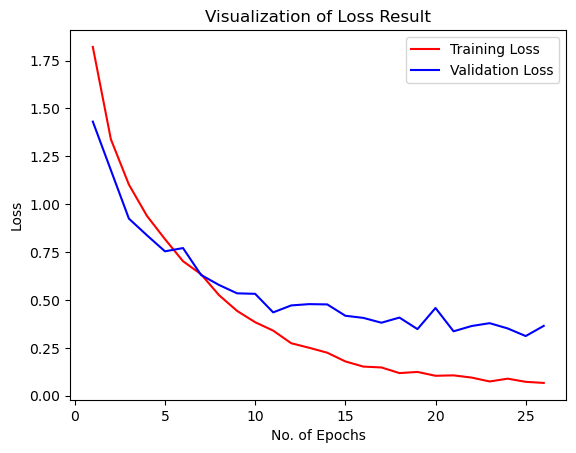

In [50]:
#Visualization of Loss
epochs = [i for i in range(1,27)]
plt.plot(epochs,training_history_data['loss'],label="Training Loss",color='red')
plt.plot(epochs,training_history_data['val_loss'],label="Validation Loss",color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.title("Visualization of Loss Result")
plt.legend()
plt.show()

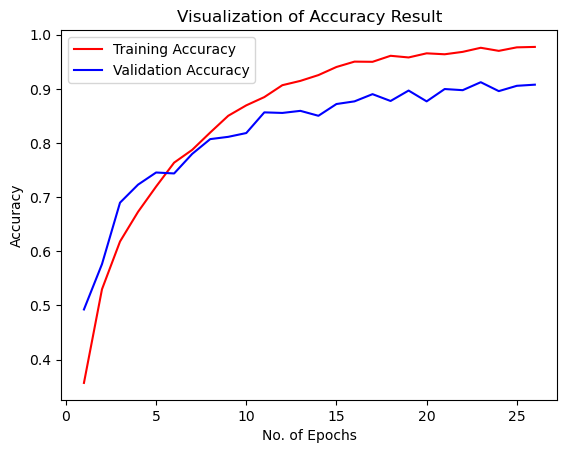

In [51]:
#Visualization of Accuracy
epochs = [i for i in range(1,27)]
plt.plot(epochs,training_history_data['accuracy'],label="Training Accuracy",color='red')
plt.plot(epochs,training_history_data['val_accuracy'],label="Validation Accuracy",color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()


## Precision,Recall,Confusion Matrix - Model Evaluation-II


In [52]:
X_test.shape


(2854, 150, 150, 1)

In [53]:
y_pred = model.predict(X_test)
y_pred

90/90 ━━━━━━━━━━━━━━━━━━━━ 35s 382ms/step


array([[3.23116291e-11, 5.63018666e-21, 1.13938495e-13, ...,
        1.76125771e-16, 2.07173535e-14, 5.10288090e-10],
       [5.06802849e-07, 9.99231696e-01, 1.08518998e-05, ...,
        1.39275596e-06, 3.58762190e-06, 7.34676576e-07],
       [2.39242599e-13, 2.09764897e-17, 2.96598531e-12, ...,
        1.00000000e+00, 7.31812527e-12, 8.13781686e-14],
       ...,
       [3.38431008e-08, 9.99961734e-01, 2.13555438e-07, ...,
        4.68760618e-07, 1.37367340e-06, 2.55168345e-07],
       [7.55923316e-02, 4.75149058e-08, 8.74036014e-01, ...,
        6.67185814e-05, 4.68235157e-06, 4.92415950e-02],
       [1.32644855e-05, 6.63878896e-10, 9.99300003e-01, ...,
        1.93051528e-04, 7.35802460e-05, 3.40500730e-04]], dtype=float32)

In [54]:
y_pred.shape


(2854, 10)

In [55]:
predicted_categories = np.argmax(y_pred,axis=1)
predicted_categories

array([6, 1, 7, ..., 1, 2, 2], dtype=int64)

In [56]:
Y_test


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [57]:
Y_test.shape


(2854, 10)

In [58]:
true_categories = np.argmax(Y_test,axis=1)
true_categories

array([6, 1, 7, ..., 1, 9, 2], dtype=int64)

In [59]:
classes

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [60]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(true_categories,predicted_categories)
# Precision Recall F1score
print(classification_report(true_categories,predicted_categories,target_names=classes))

              precision    recall  f1-score   support

       blues       0.89      0.92      0.91       311
   classical       0.97      0.94      0.96       296
     country       0.86      0.88      0.87       310
       disco       0.93      0.92      0.92       281
      hiphop       0.87      0.98      0.92       277
        jazz       0.87      0.90      0.88       186
       metal       0.96      0.93      0.94       309
         pop       0.94      0.91      0.92       309
      reggae       0.97      0.87      0.92       278
        rock       0.83      0.82      0.83       297

    accuracy                           0.91      2854
   macro avg       0.91      0.91      0.91      2854
weighted avg       0.91      0.91      0.91      2854



## Confusion Matrix Visualization


In [61]:
cm

array([[287,   0,   8,   1,   1,   4,   0,   1,   2,   7],
       [  0, 279,   3,   0,   0,  11,   0,   1,   0,   2],
       [ 11,   0, 272,   5,   0,   6,   0,   2,   1,  13],
       [  5,   0,   3, 259,   3,   0,   0,   2,   1,   8],
       [  0,   1,   1,   1, 271,   0,   2,   1,   0,   0],
       [  4,   5,   4,   0,   0, 168,   1,   0,   1,   3],
       [  3,   0,   2,   0,   6,   0, 288,   0,   0,  10],
       [  5,   2,   6,   2,   7,   1,   0, 280,   1,   5],
       [  5,   0,   1,   8,  13,   3,   0,   4, 243,   1],
       [  2,   0,  15,   4,  12,   1,  10,   8,   1, 244]], dtype=int64)

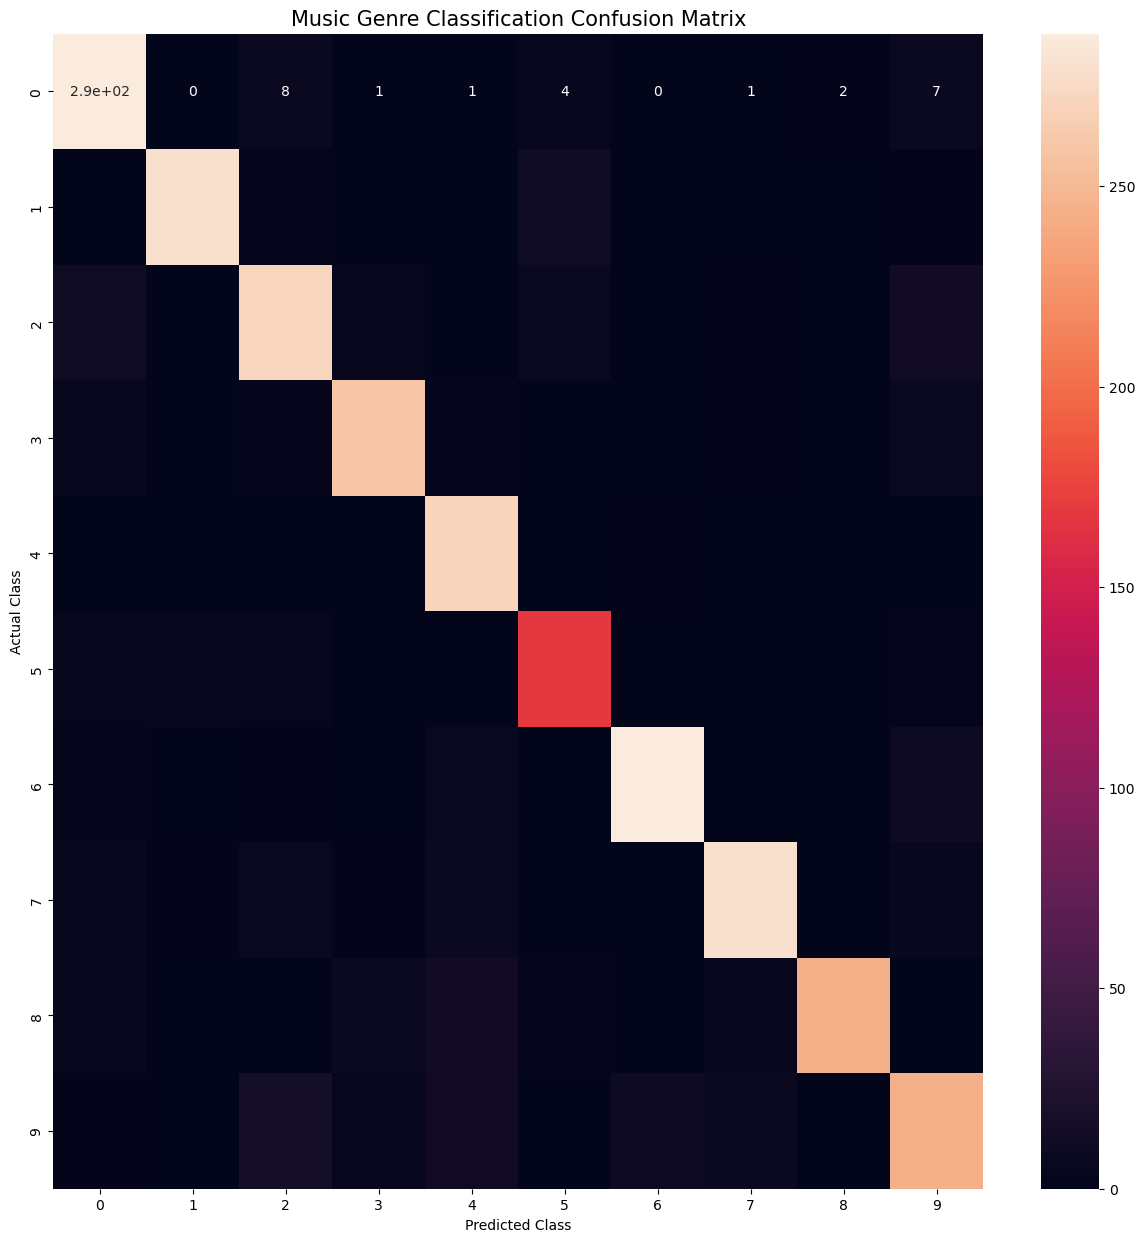

In [62]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(cm,annot=True,annot_kws={"size":10})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Music Genre Classification Confusion Matrix",fontsize=15)
plt.show()